<a href="https://colab.research.google.com/github/michaeljmcardoso/O-incra-e-os-desafios-para-regularizacao-quilombola/blob/main/Incra_e_desafios_da_regulariza%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# importar as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import plotly.express as px

from google.colab import drive

mpl.style.use('ggplot')
plt.style.use('fivethirtyeight')
sns.set(context='notebook', palette='dark', style='whitegrid')


In [2]:
# montar o drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
df = pd.read_excel('/content/gdrive/MyDrive/Processos abertos por UF.xlsx')

In [4]:
# identificar o volume de dados do DataFrame

print("-*-" * 8)
print("Entradas: \t {}".format(df.shape[0]))
print("Variáveis: \t {}\n".format(df.shape[1]))
print("-*-" * 8)

# mostrar o tipo das variáveis
display(df.dtypes)

-*--*--*--*--*--*--*--*-
Entradas: 	 27
Variáveis: 	 2

-*--*--*--*--*--*--*--*-


UF            object
Quantidade     int64
dtype: object

In [5]:
# Verificar as 5 primeiras entradas
df.head()

,UF,Quantidade
0,SR(PA/NE),48
1,SR(AM),3
2,SR(RO),7
3,SR(AP),34
4,SR(TO),33


In [6]:
# Identificar as colunas do Dataframe
df.columns

Index(['UF', 'Quantidade'], dtype='object')

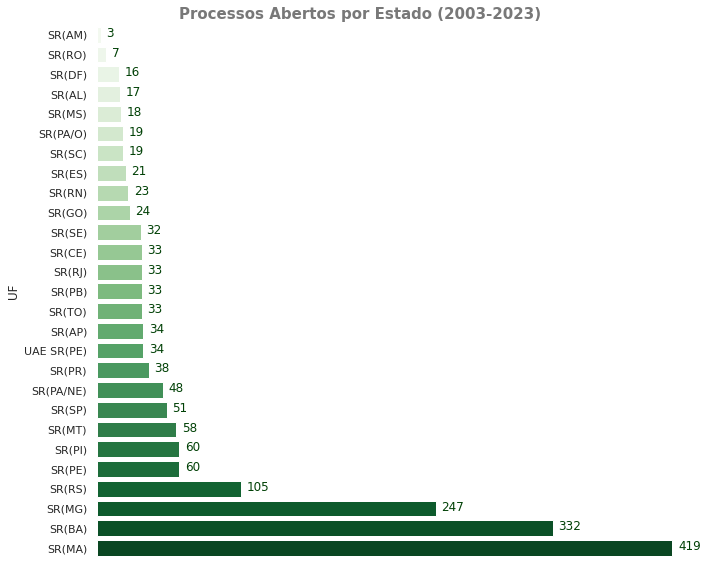

In [7]:
# Ajustar a ordem do DataFrame,
df.sort_values(by='Quantidade',  # ordenar pela quantidade,
                ascending=True, # colocar na ordem contrária a ascendente, do menor para o maior  
                inplace=True, # atualizar o DataFrame com as mudanças
                ignore_index=True) # ignorar índice anterior

# Criar variável para receber os Estados
uf = df["UF"]

# Criar variável para receber as quantidades
quantidade = df["Quantidade"]

# Criando a figure para o gráfico de barras
fig, ax = plt.subplots(figsize=(10, 8)) # tamanho 10 por 8

# Escolhendo tema do Seaborn
sns.set_theme(style="whitegrid")

# Plot do gráfico de barras com o Seaborn
sns.barplot(
            x = quantidade, 
            y = uf, 
            palette="Greens")

# Excluindo grids e eixos
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Excluindo eixo x
plt.gca().axes.get_xaxis().set_visible(False)

# Excluindo xticks do eixo x
plt.tick_params(
    axis='both',         
    which='both',     
    bottom=False,      
    top=False,         
    labelbottom=True) 

# Colocando os valores ao lado das barras
for i, v in enumerate(quantidade):
    ax.text(v + 4, i + 0.1, str(v), color = '#014106')

# Inserindo título do gráfico
plt.text(60, -0.8, "Processos Abertos por Estado (2003-2023)", # inserindo valores de posição para o title
         fontsize=15, # tamanho da fonte
         color='#787878', # cor hexadecimal
         weight='bold') # aplicando negrito

# plotando o gráfico
plt.tight_layout()